# 데이터 분석 라이브러리 활용하기! 
## - 월드컵 데이터 분석하기

### 학습 목표
- 파이썬 라이브러리 Numpy, Pandas와 Matplotlib, Seaborn을 활용해봅니다.
- 데이터를 정제하는 방법을 수행하고 학습하며 데이터 전처리 단계를 진행합니다.
- 데이터를 쉽게 이해하고 분석할 수 있도록 데이터 시각화를 연습해봅니다.

---

# Contents
**1. [월드컵 데이터](#1.-월드컵-데이터)**    
1-1. [데이터 분석 준비하기](#1-1.-데이터-분석-준비하기)      
1-2. [전체 데이터 한눈에보기](#1-2.-전체-데이터-한눈에보기)      
1-3. [데이터 전처리](#1-3.-데이터-전처리)      
1-4. [그래프로 확실하게 확인하기](#1-4.-그래프로-확실하게-확인하기)      

**2. [월드컵 매치 데이터](#2.-월드컵-매치-데이터)**     
2-1. [데이터 분석 준비하기](#2-1.-데이터-분석-준비하기)    
2-2. [꼭 필요한 데이터 전처리](#2-2.-꼭-필요한--데이터-전처리)      
2-3. [나라 이름 전처리하기](#2-3.-나라-이름-전처리하기)     
2-4. [국가별 득점 수 구하기](#2-4.-국가별-득점-수-구하기)

---

# 1. 월드컵 데이터 

## 1-1. 데이터 분석 준비하기

In [48]:
from google.colab import drive # 패키지 불러오기 
from os.path import join  

ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 Mount

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/elice_hana_DT/track_3_data_analysis/Chapter_2_get_started' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/elice_hana_DT/track_3_data_analysis/Chapter_2_get_started


In [50]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/elice_hana_DT/track_3_data_analysis/Chapter_2_get_started


### (1) Import Modules
**주의** : 꼭 아래 코드 셀을 가장 먼저 실행하신 후, 실습을 진행해주세요!

In [51]:
# numpy
import numpy as np

# pandas
import pandas as pd 

# seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### (2) Load Dataset

In [52]:
# read_csv로 csv 파일을 불러옵니다.pandas를 활용해 데이터를 가져와보도록 하겠습니다.
worldcup = pd.read_csv("WorldCups.csv")

# 데이터프레임의 크기를 확인합니다.
print(worldcup.shape)

# 데이터프레임 상위 5개 값 확인
worldcup.head(5)

(20, 10)


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


- 데이터셋의 각 컬럼에 대한 설명은 다음과 같습니다.


변수명 | 의미 | 예시
- | - | -
Year | 개최 연도 | 1930
Country | 개최 국가 | Uruguay
Winner | 우승 국가 | Uruguay
Runners-Up | 준우승 국가 | Argentina
Third | 3위 국가 | USA
Fourth | 4위 국가 | Yugoslavia
GoalsScored | 총 득점 수 | 70
QualifiedTeams | 참가 국가 수 | 13
MatchesPlayed | 총 경기 수 | 18
Attendance | 총 관중 | 590549

## 1-2. 전체 데이터 한눈에보기
- 데이터프레임의 각 열에 대한 정보와, 비어있는 데이터의 개수를 간단히 확인합니다.

In [ ]:
# info 확인하기
worldcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


## 1-3. 데이터 전처리
- 먼저 데이터 불러오기를 완료했다면, 데이터 전처리 과정을 진행해보겠습니다. 
- 데이터 전처리 단계에서는 데이터 수집 이후 데이터 정제 과정으로 비어있는 값, 중복값, 이상값 제거, 원하는 형태로의 변환등을 수행합니다.



### (1) `Attendance` : object → int 형으로 변환
- 하나의 컬럼의 값들을 일괄적으로 변환해주기 위해 `astype` 함수를 사용합니다.

In [ ]:
# astype 함수를 활용하여 Attendance 컬럼 값을 int형으로 변환
# worldcup["Attendance"] = worldcup["Attendance"].astype("int64")
# ValueError: invalid literal for int() with base 10: '590.549' --> .을 없애야 함

#### 1. 사용할 함수 `attendance_to_int` 정의
- 간단하게 `replace`를 활용해서 "."을 없애줍니다.

In [ ]:
def attendance_to_init(i):
  i = i.replace(".", "")
  return i

#### 2. 함수 적용결과 간단하게 확인
- 단 하나의 문자열로 먼저 함수의 결과를 확인합니다.

In [ ]:
attendance_to_init('590..549')

'590549'

#### 3. 데이터프레임에 `apply` 함수로 적용
- 함수 적용 결과에 문제가 없다면, 전체 데이터프레임에 적용시켜줍니다.

In [ ]:
worldcup["Attendance"] = worldcup["Attendance"].apply(attendance_to_init)
worldcup["Attendance"] = worldcup["Attendance"].astype("int64")
worldcup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


모두 적용되었습니다. 다시 한 번 데이터셋을 살펴볼까요?

In [ ]:
worldcup.info()
print("\n")
print(worldcup["Attendance"].dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


int64


### (2) 경기 당 득점 수 확인하기
- 원본 데이터에는 한 월드컵에서 득점된 전체 골의 수 `GoalsScored`와 진행된 전체 매치 수 `MatchesPlayed`가 있습니다.
- 우리는 이 둘을 활용하여 한 매치 당 득점된 골의 수의 평균을 구해보겠습니다.
- `Goals_per_Match` = `GoalsScored` / `MatchesPlayed`

In [ ]:
worldcup["Goals_per_Match"] = worldcup["GoalsScored"] / worldcup["MatchesPlayed"]
# worldcup.drop(columns=["Goal_per_Match"], inplace=True)

## 1-4. 그래프로 확실하게 확인하기
- 이번엔 데이터를 그래프로 옮겨서 확인해보겠습니다. 
- 시각화 작업은 데이터를 더 빠르고 확실하게 이해하는데에 필수적입니다.


### (1) 전체 관중수, 경기 수 그래프 그려보기

<Figure size 1152x432 with 0 Axes>

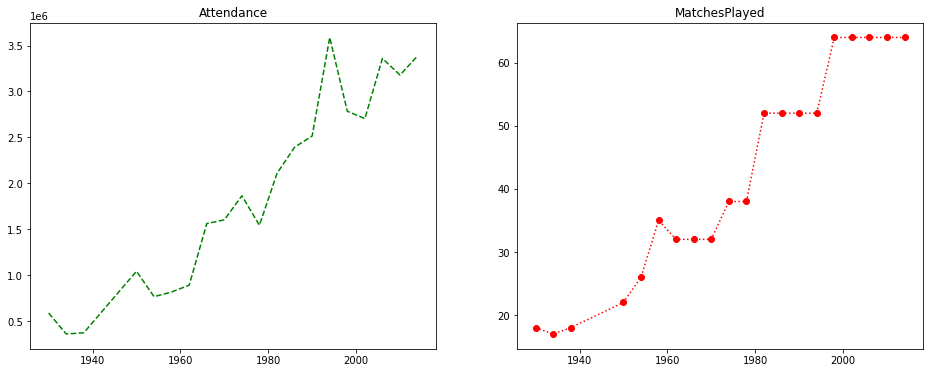

In [ ]:
# 그래프 사이즈 설정
plt.figure(figsize = (16, 6))

# 한 번에 두 개 이상의 그래프를 그리고 싶다면 subplot을 활용하면 됩니다.
# 그리고자 하는 그래프들을 행(row), 열(column) 로 배열할 때,
# subplot(row, column, order) 순서대로 숫자를 입력하면 됩니다.
# plt.subplot(121)
# plt.plot("Year", "Attendance", data = worldcup)
# plt.title("Attendance")

# plt.subplot(122)
# plt.plot("Year", "MatchesPlayed", data = worldcup)
# plt.title("Matches Played")
# plt.show()

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
# 그래프
ax[0].plot("Year", "Attendance", "g--", data = worldcup)
ax[1].plot("Year", "MatchesPlayed", "ro:", data = worldcup)

# 제목
ax[0].set_title("Attendance")
ax[1].set_title("MatchesPlayed")

plt.show()

### (2) 전체 득점 수, 전체 매치 수, 매치 당 골 수 그래프 그려보기

- 이번에는 득점에 관련된 그래프들을 확인해보겠습니다.

- `GoalsScored`, `MatchesPlayed`, `Goals_per_Match`는 모두 년도별로 비교하면 좋은 데이터이기 때문에, 한 그래프 안에 모두 표현해보겠습니다.

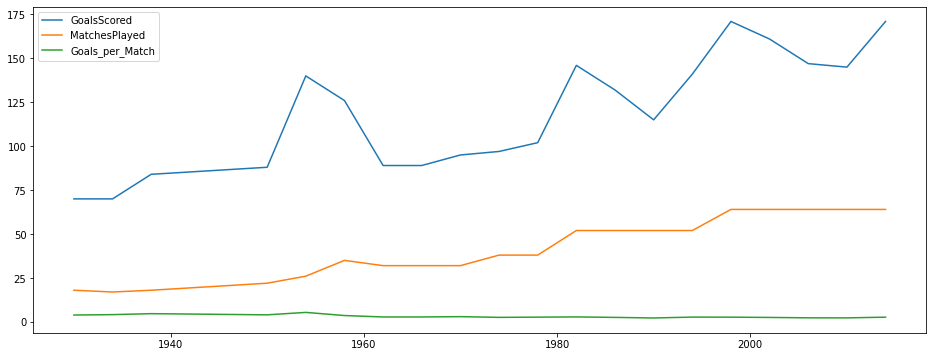

In [ ]:
plt.figure(figsize=(16, 6))

plt.plot("Year", "GoalsScored", data = worldcup)
plt.plot("Year", "MatchesPlayed", data = worldcup)
plt.plot("Year", "Goals_per_Match", data = worldcup)

plt.legend()
plt.show()

---

# 2. 월드컵 매치 데이터

## 2-1. 데이터 분석 준비하기

### (1) Load Dataset

이번에는 월드컵 매치 데이터를 확인해보겠습니다.     
이번에는 `WorldCupMatches.csv` 데이터를 사용합니다. 역시 pandas로 데이터를 가져옵니다.

In [ ]:
# read_csv
match = pd.read_csv("WorldCupMatches.csv")

# shape 출력
print(match.shape)

# 상위 5개 값 확인
match.head(5)

(4572, 20)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


- 데이터셋의 각 컬럼에 대한 설명은 다음과 같습니다.


변수명 | 의미 | 예시
- | - | -
Year | 경기가 진행된 연도 | 1930
Datetime | 경기 시작 시간 | 13 Jul 1930 - 15:00
Stage | 스테이지(조별리그, 16강, 8강 등) | Group 1
Stadium | 경기장 | Pocitos
City | 도시 | Montevideo
Home Team Name | 홈 팀 국가 이름 | France
Home Team Goals | 홈 팀 득점 수 | 4	
Away Team Goals | 원정 팀 득점 수 | 1
Away Team Name | 원정 팀 국가 이름 | Mexico
Win conditions | 승리 상황  | Italy win after extra time
Attendance | 관중 수 | 4444
Half-time Home Goals | 홈 팀 전반전 득점 수 | 3
Half-time Away Goals | 원정 팀 전반전 득점 수 | 0
Referee | 주심의 이름 | LOMBARDI Domingo (URU)	
Assistant 1 | 제 1 부심(선심)의 이름 | CRISTOPHE Henry (BEL)	
Assistant 2 | 제 2 부심(선심)의 이름 | REGO Gilberto (BRA)	
RoundID | 라운드의 고유 ID | 201
MatchID | 경기의 고유 ID | 1096
Home Team Initials | 홈 팀의 세 글자 이니셜 | FRA
Away Team Initials | 원정 팀의 세 글자 이니셜 | MEX

## 2-2. 꼭 필요한  데이터 전처리
- 데이터를 다루기 전에 꼭 확인하고 처리해야 할 것들이 있습니다. 바로 확인해보겠습니다.

### (1) 전체 데이터 확인

- 세부적으로 보기 이전에, 먼저 전체 데이터를 확인해보겠습니다.

In [ ]:
# info 확인
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

### (2) 결측치 (빈 데이터)

- 결측치가 있다면 pandas에서 사용하는 대부분의 함수 또는 연산이 작동하지 않습니다. 따라서 결측치를 먼저 확인해주는 습관을 가지고 있으면 좋습니다.




- 결측치는 `isnull()` 함수로 확인해볼 수 있습니다.

In [ ]:
# isnull로 결측치 확인
match.isnull().head() # 구분하기 어려움

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 전체 컬럼별 결측치 개수 확인하기
match.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [ ]:
# 총 결측치 개수 확인하기
match.isnull().sum().sum()

74402

In [ ]:
# 행 별 결측치 개수 확인하기
match.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
4567    20
4568    20
4569    20
4570    20
4571    20
Length: 4572, dtype: int64

In [ ]:
# dropna를 활용하여 null 값이 있는 행 지우기
match = match.dropna()
print(match.shape)

(850, 20)


In [ ]:
# 결측치 개수 다시 확인하기
match.isnull().sum().sum()

0

### (3) 중복된 데이터

- 비어있는 데이터 다음에는 중복된 데이터도 확인해봐야겠죠. `duplicated()` 함수를 활용해 간단히 확인할 수 있습니다.



- 역시 뒤에 `sum()`을 붙여  개수를 확인해보겠습니다.

In [ ]:
# 중복된 데이터 개수 확인하기
match.duplicated().sum()

15

In [ ]:
# drop_duplicates로 중복 데이터 제거하기
match = match.drop_duplicates()

In [ ]:
# 중복 데이터 개수 다시 확인하기
match.duplicated().sum()

0

## 2-3. 나라 이름 전처리하기
- 뒤에 다양한 분석을 해보기 전에 나라 이름을 먼저 확인해보고 필요한 경우 처리를 해주도록 하겠습니다.

In [ ]:
# unique를 사용하여 Home Team Name/Away Team Name 나라 이름 확인
match["Home Team Name"].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey',
       'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire',
       'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti',
       'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco',
       'Korea Republic', 'Iraq', 'Denmark', 'rn">United Arab Emirates',
       'Costa Rica', 'Cameroon', 'rn">Republic of Ireland', 'Colombia',
       'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece',
       'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR',
       'Senegal', 'Slovenia', 'Ecuador', 'rn">Trinidad and Tobago',
       'rn">Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "C�te d'Ivoire", 'Ghana

몇 가지 처리해주어야 할 나라이름들이 보입니다. 다음 나라 이름들을 `replace` 함수로  변환해주도록 하겠습니다.
- `Germany FR` → `Germany`
- `C�te d'Ivoire` → `Côte d’Ivoire`
- `rn">Bosnia and Herzegovina` → `Bosnia and Herzegovina`
- `rn">Serbia and Montenegro` → `Serbia and Montenegro`
- `rn">Trinidad and Tobago` → `Trinidad and Tobago`
- `rn">United Arab Emirates` → `United Arab Emirates`
- `rn">Republic of Ireland` → `Republic of Ireland`
- `Soviet Union` → `Russia`

- 딕셔너리를 활용한 변환

In [ ]:
df = pd.DataFrame({"column1": ["a", "b", "a", "c"]})
print(df)

  column1
0       a
1       b
2       a
3       c


- 첫번째 방법
  : 하나씩 처리하는 방법 

In [ ]:
df = df.replace("a", "x")
df = df.replace("b", "y")
print(df)

  column1
0       x
1       y
2       x
3       c


- 두번째 방법: 딕셔너리를 활용하는 방법

In [ ]:
rep_dict = {
    "a": "x", 
    "b": "y"
}
df["column1"].replace(rep_dict, inplace=True)
print(df)

  column1
0       x
1       y
2       x
3       c


- `Germany FR` → `Germany`
- `C�te d'Ivoire` → `Côte d’Ivoire`
- `rn">Bosnia and Herzegovina` → `Bosnia and Herzegovina`
- `rn">Serbia and Montenegro` → `Serbia and Montenegro`
- `rn">Trinidad and Tobago` → `Trinidad and Tobago`
- `rn">United Arab Emirates` → `United Arab Emirates`
- `rn">Republic of Ireland` → `Republic of Ireland`
- `Soviet Union` → `Russia`

In [ ]:
# replace 사용하여 변환
match = match.replace("Germany FR", "Germany")
match = match.replace("C�te d'Ivoire", "Côte d’Ivoire")
match = match.replace('rn">Bosnia and Herzegovina', 'Bosnia and Herzegovina')
match = match.replace('rn">Serbia and Montenegro', 'Serbia and Montenegro')
match = match.replace('rn">Trinidad and Tobago', 'Trinidad and Tobago')
match = match.replace('rn">United Arab Emirates', 'United Arab Emirates')
match = match.replace('rn">Republic of Ireland', 'Republic of Ireland')
match = match.replace('Soviet Union', 'Russia')

In [ ]:
# unique 를 활용하여 변환 확인
match["Home Team Name"].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Turkey', 'Russia',
       'Northern Ireland', 'Mexico', 'Wales', 'Portugal', 'Korea DPR',
       'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire', 'Poland',
       'Australia', 'Scotland', 'Netherlands', 'Haiti', 'Tunisia',
       'Algeria', 'Honduras', 'Canada', 'Morocco', 'Korea Republic',
       'Iraq', 'Denmark', 'United Arab Emirates', 'Costa Rica',
       'Cameroon', 'Republic of Ireland', 'Colombia', 'Norway', 'Nigeria',
       'Saudi Arabia', 'Bolivia', 'Greece', 'Jamaica', 'South Africa',
       'Japan', 'Croatia', 'China PR', 'Senegal', 'Slovenia', 'Ecuador',
       'Trinidad and Tobago', 'Serbia and Montenegro', 'Angola',
       'Czech Republic', 'Togo', 'Iran', 'Côte d’Ivoire', 'Ghana',
       'Ukraine', 'Serbia', 'New Zealand', 'Slovak

In [ ]:
# Home Team Name과 Away Team Name이 동일한지 확인하기
set(match["Away Team Name"].unique()) - set(match["Home Team Name"].unique())

{'Dutch East Indies', 'Egypt', 'El Salvador', 'Israel', 'Kuwait'}

## 2-4. 국가별 득점 수 구하기
- 이번에는 각  국가별 득점 수를 구해보도록 하겠습니다. 어떤 나라가 많은 득점을 했을까요?

#### (1) Home Team과 Away Team 별 데이터 추출하기

- `groupby`로 우리가 원하는 데이터를 추출해낼 수 있습니다. 
- 각 나라가 홈 팀으로 얻은 득점과, 원정팀으로 얻은 득점을 합쳐 구해보겠습니다.

In [ ]:
# groupby로 Home Team Name 별 데이터 묶기
match.groupby(['Home Team Name'])

In [ ]:
# 득점 확인하기
# sort_values
home = match.groupby(['Home Team Name'])['Home Team Goals'].sum().sort_values(ascending=False)
away = match.groupby(['Away Team Name'])['Away Team Goals'].sum().sort_values(ascending=False)

In [ ]:
# home 팀 상위 5개 값 확인
home.head()

Home Team Name
Brazil       176.0
Germany      163.0
Argentina    109.0
Italy         99.0
Hungary       73.0
Name: Home Team Goals, dtype: float64

In [ ]:
# away 팀 상위 5개 값 확인
away.head()

Away Team Name
Germany        59.0
Brazil         45.0
Spain          42.0
France         40.0
Netherlands    37.0
Name: Away Team Goals, dtype: float64

In [ ]:
# concat을 활용하여 두개의 Series 데이터 합치기
goal_per_country = pd.concat([home, away], axis = 1) # 열을 합치기 위한 것
goal_per_country

,Home Team Goals,Away Team Goals
Brazil,176.0,45.0
Germany,163.0,59.0
Argentina,109.0,22.0
Italy,99.0,29.0
Hungary,73.0,14.0
...,...,...
Egypt,NaN,3.0
Kuwait,NaN,2.0
El Salvador,NaN,1.0
Israel,NaN,1.0


In [ ]:
# NaN 값을 0으로 채워주고, 정수로 변환 
goal_per_country = goal_per_country.fillna(0).astype('int64')
goal_per_country.isnull().sum()

Home Team Goals    0
Away Team Goals    0
dtype: int64

- 이제 두 값을 더해서 전체 골을 만들어보고, 전체 데이터를 `Goals`로 정렬해주도록 하겠습니다.

In [ ]:
# Home Team Goals + Away Team Goals
# sort_values
goal_per_country["Goals"] = goal_per_country["Home Team Goals"] + goal_per_country["Away Team Goals"]
goal_per_country = goal_per_country.sort_values(by = "Goals", ascending=False)
goal_per_country

,Home Team Goals,Away Team Goals,Goals
Germany,163,59,222
Brazil,176,45,221
Argentina,109,22,131
Italy,99,29,128
France,66,40,106
...,...,...,...
Canada,0,0,0
Zaire,0,0,0
Trinidad and Tobago,0,0,0
China PR,0,0,0


#### (2) 상위 10개국 득점 수 시각화해보기

- 상위 10개국만 그래프로 시각화 해보겠습니다.
- 표에서 나라 이름이 index로 사용되었으므로, x는 `top_10.index`로 넣어주면 됩니다.

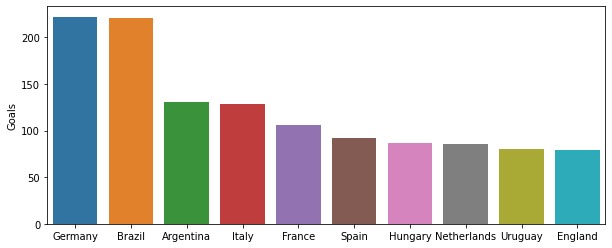

In [ ]:
top_10 = goal_per_country[:10]
plt.figure(figsize=(10, 4))

sns.barplot(data=top_10, x = top_10.index, y = "Goals")
plt.show()